# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest Data  

In [85]:
df=pd.read_csv("World military power.xlsx - data.csv")

# EDA

## Implement basic steps to see how is your data looks like

In [86]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,"28,748",Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,"6,734"
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600",Angola,"1,300",Angola,"5,369"


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   2020 ranking       139 non-null    object
 1   Unnamed: 1         139 non-null    object
 2   Airforce Strength  139 non-null    object
 3   Unnamed: 3         139 non-null    object
 4   Unnamed: 4         139 non-null    object
 5   Unnamed: 5         139 non-null    object
 6   Unnamed: 6         139 non-null    object
 7   Unnamed: 7         139 non-null    object
 8   Unnamed: 8         139 non-null    object
 9   Unnamed: 9         139 non-null    object
 10  Unnamed: 10        139 non-null    object
 11  Unnamed: 11        139 non-null    object
 12  Unnamed: 12        139 non-null    object
 13  Unnamed: 13        139 non-null    object
 14  Unnamed: 14        139 non-null    object
 15  Unnamed: 15        139 non-null    object
 16  Land Strength      139 non-null    object
 1

In [88]:
df.describe()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
count,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,110,110,139,139,130,130
unique,139,139,139,114,139,64,139,39,139,50,...,139,139,139,139,110,105,139,93,130,126
top,Military Strength,Military Strength Power Index,Aircraft Strength,19,Fighter/Interceptor Strength,0,Attack Aircraft Strength,0,Transport Aircraft Fleet Strength,0,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,853,Total Waterway Coverage,0,Total Border Coverage,"1,667"
freq,1,1,1,5,1,46,1,75,1,15,...,1,1,1,1,1,2,1,38,1,2


In [89]:
df.shape

(139, 60)

## Convert multi index columns to one level

In [90]:
df=df.T.set_index(0).T
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,"28,748",Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,"6,734"
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600",Angola,"1,300",Angola,"5,369"
5,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,"4,989",Argentina,"11,000",Argentina,"11,968"


In [91]:
df=df.set_index("Military Strength")
df.head()

,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
Military Strength,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"
Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,...,Albania,"30,57,220",Albania,"28,748",Albania,362,Albania,41,Albania,691
Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,"6,734"
Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600",Angola,"1,300",Angola,"5,369"
Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,"4,989",Argentina,"11,000",Argentina,"11,968"


In [92]:
df.index.name=None
df.head()

,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"
Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,...,Albania,"30,57,220",Albania,"28,748",Albania,362,Albania,41,Albania,691
Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,"6,734"
Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600",Angola,"1,300",Angola,"5,369"
Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,"4,989",Argentina,"11,000",Argentina,"11,968"


In [93]:
df=df.iloc[:,::2]
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Afghanistan,1.3444,260,0,25,30,0,187,0,0,"1,062",...,43,0,"5,500",0,"1,43,25,743","3,49,40,837","6,52,230",0,"1,200","5,987"
Albania,2.3137,19,0,0,0,0,19,0,0,467,...,4,"16,000","42,500","16,83,00,000","15,19,438","30,57,220","28,748",362,41,691
Algeria,0.4659,551,103,22,59,87,257,45,880,"7,361",...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,"6,734"
Angola,0.8379,295,72,18,30,47,126,15,379,595,...,176,"16,66,000","82,300","8,27,30,00,000","62,44,205","3,03,55,880","12,46,700","1,600","1,300","5,369"
Argentina,0.6521,227,24,7,9,64,100,0,370,739,...,"1,138","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400","4,989","11,000","11,968"


In [94]:
df=df.apply(lambda x : x.astype('string').str.replace(',',''))

In [95]:
df=df.astype(float)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value 

In [97]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,109.000000,138.000000,129.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,...,290.043478,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07,9.546746e+05,6171.330275,5464.130435,3964.224806
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,...,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08,2.225571e+06,20759.011908,16494.534600,3760.099671
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05,6.970000e+02,0.000000,0.000000,29.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,...,33.500000,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06,8.455325e+04,443.000000,0.000000,1587.000000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,...,68.000000,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07,3.054200e+05,1566.000000,875.000000,2816.000000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,...,150.750000,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07,7.929618e+05,3444.000000,3050.000000,5267.000000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,...,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09,1.709824e+07,202080.000000,110000.000000,22457.000000


In [98]:
df.sample(4)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Colombia,0.6045,469.0,21.0,38.0,76.0,80.0,224.0,0.0,0.0,595.0,...,836.0,853600.0,300000.0,2.002000e+09,24084498.0,48168996.0,1138910.0,3208.0,24725.0,6672.0
Iran,0.2191,509.0,155.0,23.0,62.0,94.0,100.0,12.0,2056.0,4300.0,...,319.0,4469000.0,2000000.0,1.584000e+11,47324105.0,83024745.0,1648195.0,2440.0,850.0,5894.0
Mongolia,2.0299,9.0,0.0,0.0,3.0,0.0,6.0,0.0,470.0,750.0,...,44.0,20000.0,25000.0,0.000000e+00,1818609.0,3103428.0,1564116.0,NaN,580.0,8082.0
Turkey,0.2098,1055.0,206.0,0.0,80.0,276.0,497.0,100.0,2622.0,8777.0,...,98.0,245000.0,845000.0,3.885000e+08,41847478.0,81257239.0,783562.0,7200.0,1200.0,2816.0


In [99]:
df.columns

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastline Coverage value',
       '

## Detect and drop duplicated columns

In [100]:
df.duplicated().sum()

0

## Check for missing values 

In [101]:
mis=df.isnull().sum
df.isnull().index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=138)

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [102]:
df.drop(["Aircraft Carrier Fleet Strength value",
         "Submarine Fleet Strength value",
         "Destroyer Fleet Strength value"],axis=1,inplace=True)

In [103]:
X=df

In [104]:
from sklearn.impute import KNNImputer
nan=np.nan
imputer=KNNImputer(n_neighbors=2,weights="uniform")
imputer.fit_transform(X)

array([[1.3444e+00, 2.6000e+02, 0.0000e+00, ..., 0.0000e+00, 1.2000e+03,
        5.9870e+03],
       [2.3137e+00, 1.9000e+01, 0.0000e+00, ..., 3.6200e+02, 4.1000e+01,
        6.9100e+02],
       [4.6590e-01, 5.5100e+02, 1.0300e+02, ..., 9.9800e+02, 0.0000e+00,
        6.7340e+03],
       ...,
       [1.2412e+00, 1.6900e+02, 7.7000e+01, ..., 1.9060e+03, 0.0000e+00,
        1.6010e+03],
       [1.6464e+00, 1.0800e+02, 1.8000e+01, ..., 6.7650e+02, 2.2500e+03,
        6.0430e+03],
       [1.7577e+00, 9.0000e+01, 1.0000e+01, ..., 3.8100e+02, 0.0000e+00,
        3.2290e+03]])

In [105]:
df["Total Coastline Coverage value"]=df["Total Coastline Coverage value"].replace(np.nan,0)


In [106]:
df["Frigate Fleet Strength value"]=df["Frigate Fleet Strength value"].replace(np.nan,0)

In [107]:
df["Navy Fleet Strengths value"]=df["Navy Fleet Strengths value"].replace(np.nan,0)

In [108]:
df["Total Border Coverage value"]=df["Total Border Coverage value"].replace(np.nan,0)

In [109]:
df.isnull().sum()

0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Production value                       0
Oil Consumption value                      0
Proven Oil Reserves value                  0
Available Manpower value                   0
Total Po

## Fix the dtypes

In [110]:
#df=df.apply(lambda x : x.astype('string').str.replace(',',''))

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

## Visualy inspect the some features

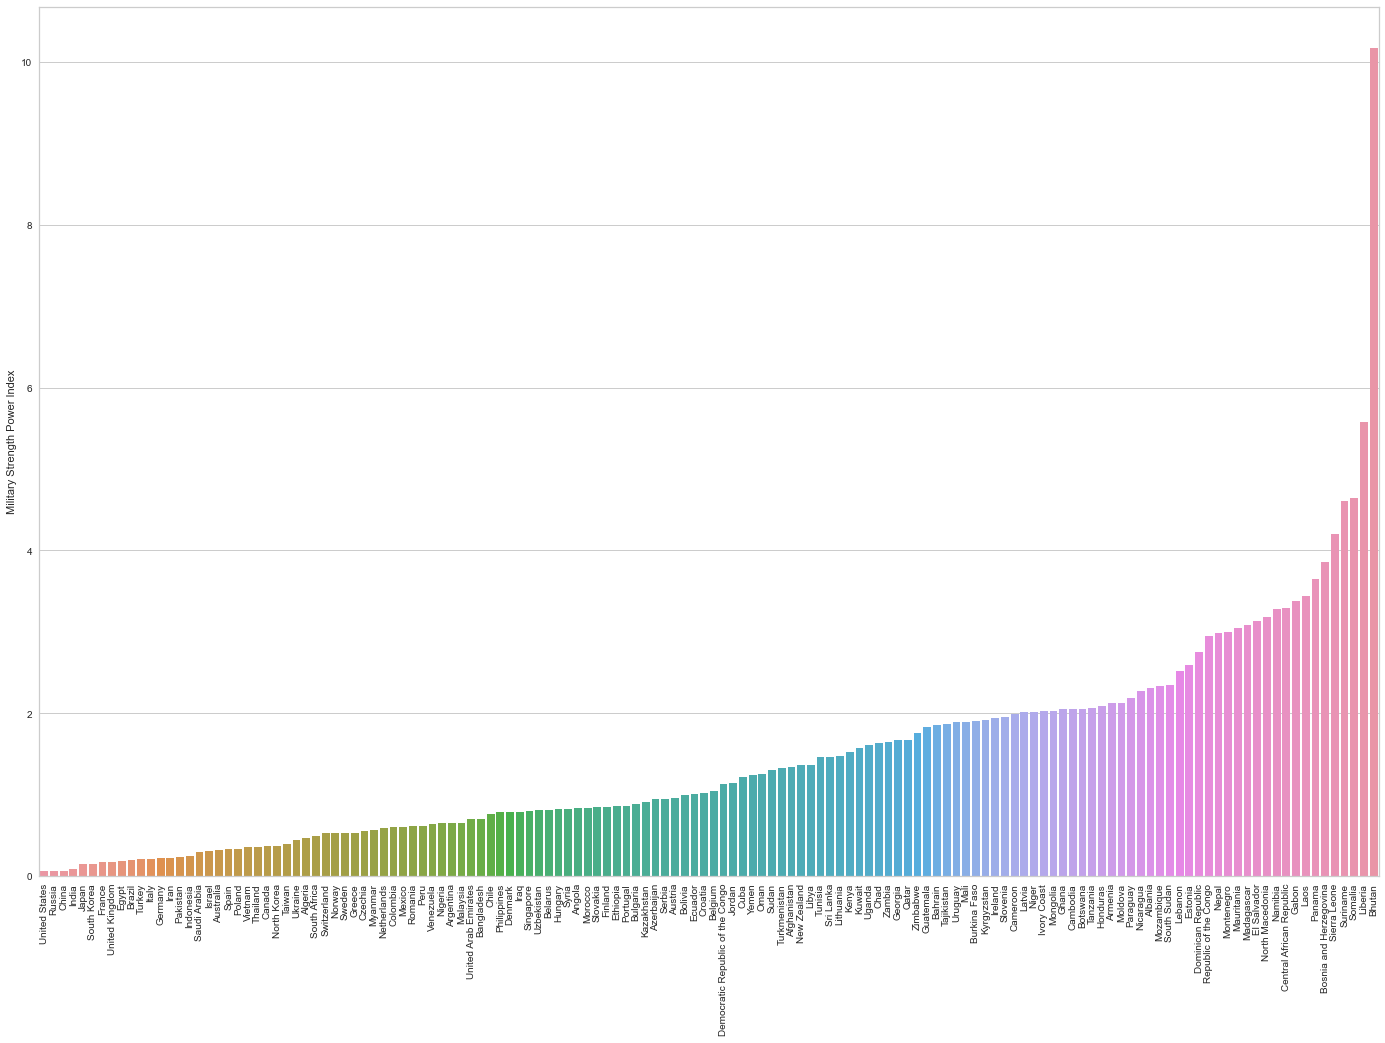

In [111]:
military_power = X['Military Strength Power Index'].sort_values()

plt.figure(figsize = (24,16))
sns.barplot(y = military_power, x = military_power.index)
plt.xticks(rotation = 90);


## Descriptive statistics

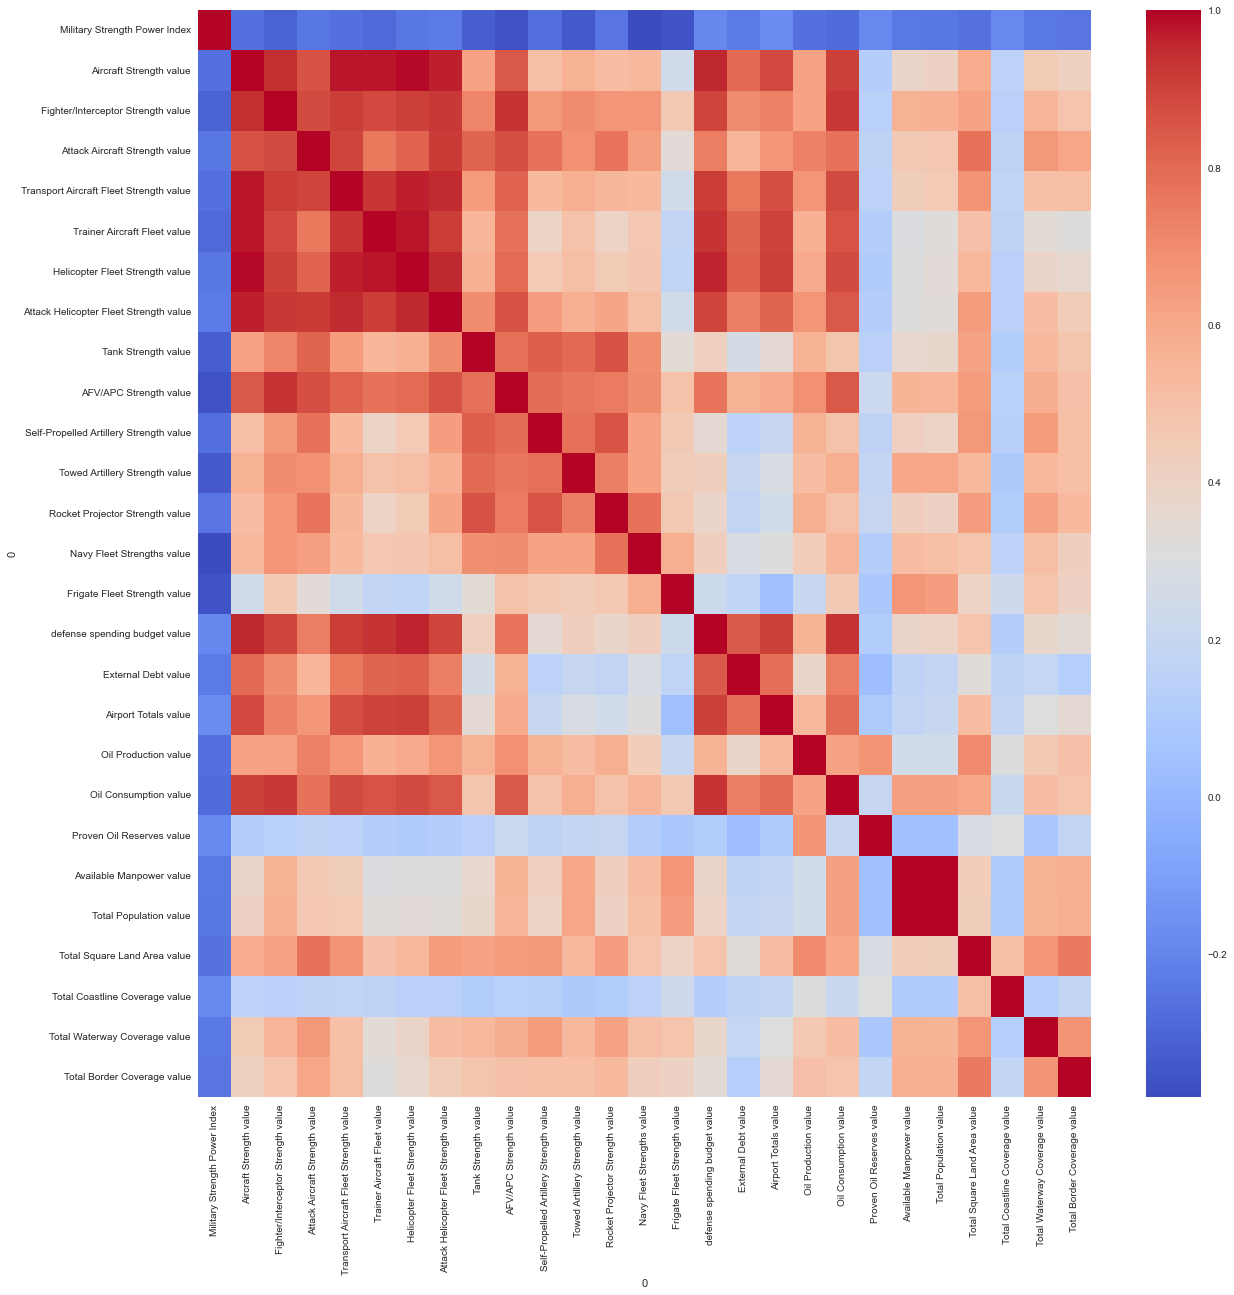

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="coolwarm");

# Data Preprocessing

In [113]:
X=df.copy()

In [114]:
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [115]:
X.shape

(138, 27)

In [116]:
X.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,138.000000,138.000000,138.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,...,290.043478,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07,9.546746e+05,4874.456522,5464.130435,3705.688406
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,...,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08,2.225571e+06,18603.336310,16494.534600,3764.917170
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05,6.970000e+02,0.000000,0.000000,0.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,...,33.500000,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06,8.455325e+04,49.750000,0.000000,1401.250000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,...,68.000000,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07,3.054200e+05,793.000000,875.000000,2564.500000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,...,150.750000,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07,7.929618e+05,2746.500000,3050.000000,5015.500000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,...,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09,1.709824e+07,202080.000000,110000.000000,22457.000000


In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value 

# Scaling

In [118]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [119]:
scaler = StandardScaler()

In [120]:
df_scaled = scaler.fit_transform(df)

In [121]:
X1 = pd.DataFrame(df_scaled, columns=df.columns)
X1.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,...,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.110873,-0.136390,-0.262975,-0.259460,0.608147
1,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,...,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.304683,-0.417556,-0.243445,-0.329981,-0.803649
2,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,...,-0.110084,0.433720,-0.174470,0.006007,-0.055840,-0.070045,0.643550,-0.209133,-0.332476,0.807280
3,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,...,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,-0.138744,0.131692,-0.176656,-0.253375,0.443402
4,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,...,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,-0.051586,0.823329,0.006180,0.336841,2.202548


# Modelling

In [122]:
from sklearn.cluster import KMeans, AgglomerativeClustering

K_means_model = KMeans(n_clusters=5, random_state=42)

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [123]:
from pyclustertend import hopkins

In [124]:
hopkins(X1, X1.shape[0])

0.08595089192020335

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [125]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

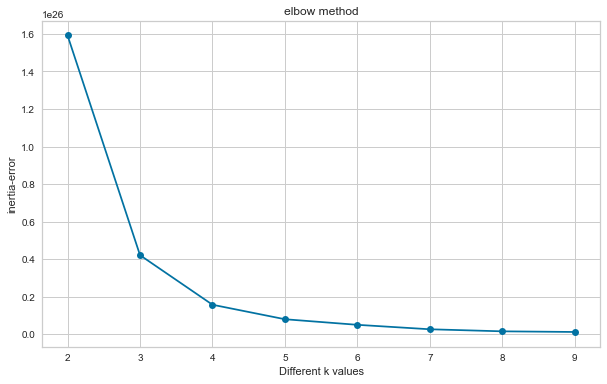

In [126]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

In [127]:
ssd

[1.5917092822833962e+26,
 4.20869351015841e+25,
 1.5683101158001778e+25,
 7.956312590221113e+24,
 4.984308976659091e+24,
 2.614267678229321e+24,
 1.5160985095542038e+24,
 1.1726889378721188e+24]

In [128]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,1.170840e+26
3,2.640383e+25
4,7.726789e+24
5,2.972004e+24
6,2.370041e+24
7,1.098169e+24
8,3.434096e+23


<AxesSubplot:>

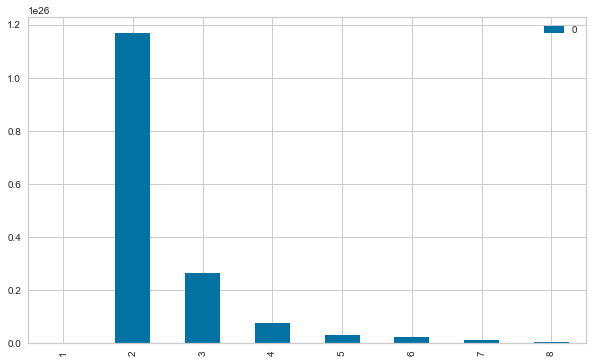

In [129]:
df_diff.plot(kind='bar')

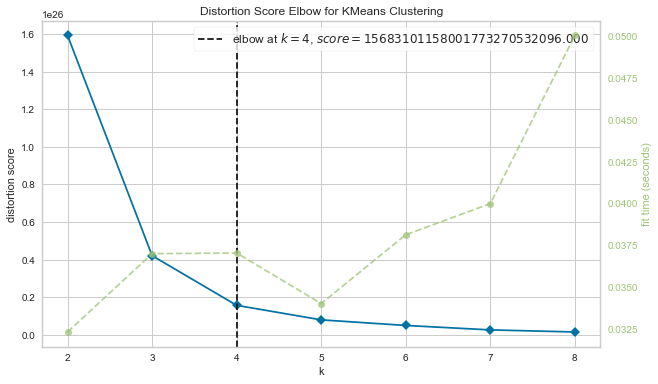

In [130]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

### Model Building and label visualisation

In [131]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [132]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

### Evaluate 

In [133]:

clusters=model.labels_


In [134]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [135]:
X["predicted_clusters"]=clusters
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [136]:
X["predicted_clusters"].value_counts()

0    132
2      5
1      1
Name: predicted_clusters, dtype: int64

In [152]:
X[X["predicted_clusters"]==0]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,predicted_clusters
Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0
Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0
Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0
Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0
Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.0,7100.0,5267.0,0
Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.0,17702.0,4616.0,0
Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.0,0.0,1601.0,0
Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,...,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,752618.0,0.0,2250.0,6043.0,0


In [155]:
a=X["Military Strength Power Index"].sort_values()

## Hierarchical Clustering

In [138]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [139]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

### Model Building and label visualisation

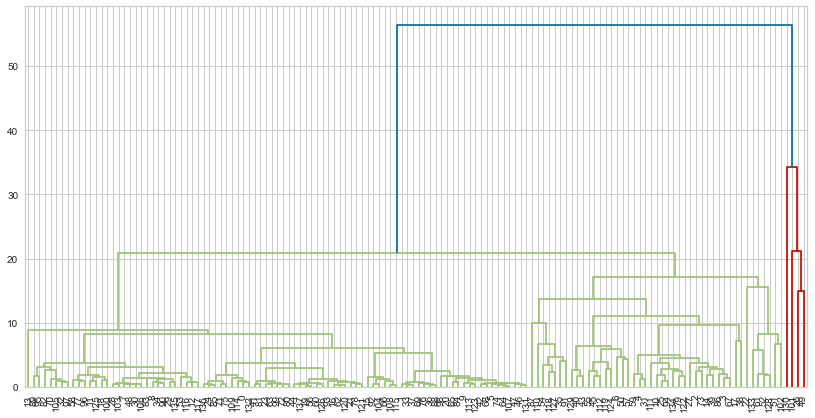

In [140]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

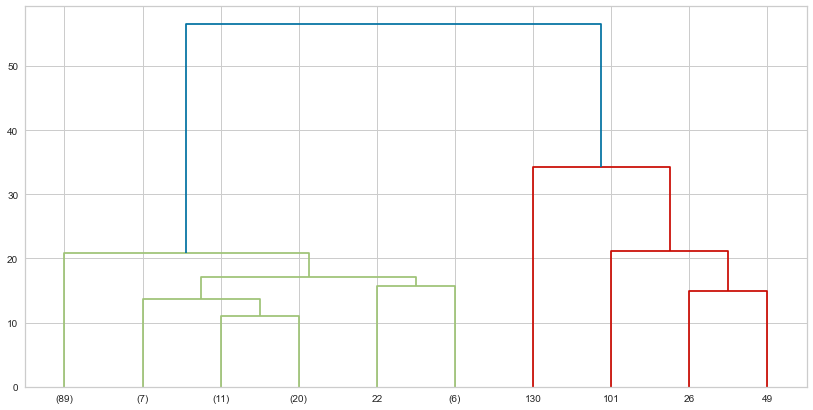

In [141]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           leaf_font_size = 10);

### Evaluate 

In [142]:
from sklearn.metrics import silhouette_score

In [143]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.8324653253303379
Silhouette Score for 3 clusters: 0.3702325141320556
Silhouette Score for 4 clusters: 0.0495654524043407
Silhouette Score for 5 clusters: 0.09151807728514276
Silhouette Score for 6 clusters: 0.05764916672096149
Silhouette Score for 7 clusters: -0.16229322751849723
Silhouette Score for 8 clusters: -0.15402841161408426
Silhouette Score for 9 clusters: -0.46272218844508795


In [144]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X1)

In [145]:
X1["cluster"] = clusters
X1.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
0,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,...,-0.352511,-0.322322,-0.280406,-0.132033,-0.110873,-0.136390,-0.262975,-0.259460,0.608147,1
1,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,...,-0.342879,-0.305200,-0.276455,-0.284127,-0.304683,-0.417556,-0.243445,-0.329981,-0.803649,1
2,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,...,0.433720,-0.174470,0.006007,-0.055840,-0.070045,0.643550,-0.209133,-0.332476,0.807280,1
3,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,...,0.650446,-0.286782,-0.086185,-0.228013,-0.138744,0.131692,-0.176656,-0.253375,0.443402,1
4,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,...,-0.063905,-0.007876,-0.229110,-0.062512,-0.051586,0.823329,0.006180,0.336841,2.202548,1


In [146]:
clus_pred = X1.groupby("cluster").mean().T
clus_pred

cluster,0,1,2
0,,,
Military Strength Power Index,-1.048517,0.031395,-1.061327
Aircraft Strength value,2.262191,-0.128923,10.489144
Fighter/Interceptor Strength value,3.483547,-0.143139,8.729991
Attack Aircraft Strength value,4.274269,-0.150304,7.317921
Transport Aircraft Fleet Strength value,2.925165,-0.139695,9.943640
Trainer Aircraft Fleet value,1.280236,-0.108293,10.670489
Helicopter Fleet Strength value,1.731833,-0.119605,10.831533
Attack Helicopter Fleet Strength value,2.605989,-0.130788,9.707636
Tank Strength value,4.150721,-0.120813,3.736804


<AxesSubplot:xlabel='0'>

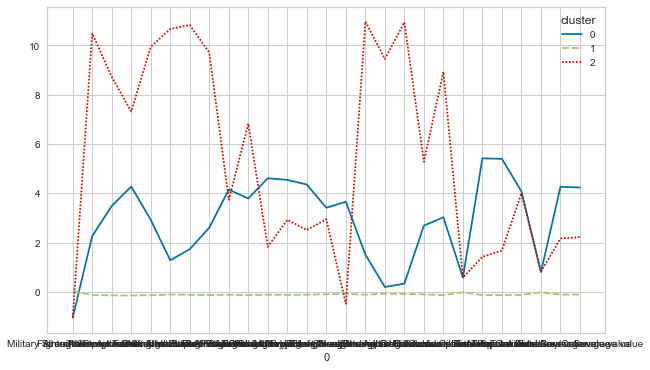

In [147]:
sns.lineplot(data = clus_pred)

In [148]:
X1.cluster.value_counts()

1    134
0      3
2      1
Name: cluster, dtype: int64

In [149]:
df.columns

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Frigate Fleet Strength value',
       'defense spending budget value', 'External Debt value',
       'Airport Totals value', 'Oil Production value', 'Oil Consumption value',
       'Proven Oil Reserves value', 'Available Manpower value',
       'Total Population value', 'Total Square Land Area value',
       'Total Coastline Coverage value', 'Total Waterway Coverage value',
       'Total Border Coverage value'],
      dtype='object', name=0)